# **Insights from Failed Orders**

Gett, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

Please complete the following tasks.

Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
Plot the distribution of average ETA by hours. How can this plot be explained?
BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

First of all, we have to import all needed packages for exploring this dataset.

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns 

Secondly, we have to import csv file from computer to jupyter notebook:

In [2]:
downloads_path = os.path.expanduser("~/Downloads/")
file_path = os.path.join(downloads_path, "data_offers.csv")
df = pd.read_csv(file_path)
df.head(5)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


First dataset contains :
'order_gk' - order number, associated with the same column from the 'orders' data set.
'offer_id' - ID of an offer. 

We don't need this data set for this project, as we work with data in generall, not individually with every order.

In [3]:
file_path2 = os.path.join(downloads_path, "data_orders.csv")
df1 = pd.read_csv(file_path2)
df1.head(25)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
5,21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN
6,07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN
7,07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN
8,08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0


**order_datetime - time of the order**
origin_longitud**e - longitude of the order**
origin_latitu**de - latitude of the orde**r
m_order_**eta - time before order arriv**al
orde**r_gk - order num**ber
order_statu**s_key - status, an enumeration consisting of the following mapp    ing:
4 - cancelled by cl    ient,
9 - cancelled by system, i.e., a **reject
is_driver_assi**gned_key - whether a driver has been a**ssigned
cancellation_time_i**n_seconds - how many seconds passed before cancellation

### TASK 1 

In [4]:
# Look closely at summary data about data set 
df1.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


In [5]:
# Filter data for only client cancellation
client_c = df1[df1['order_status_key'] == 4]
client_c['is_driver_assigned_key'].value_counts()

is_driver_assigned_key
0    4496
1    2811
Name: count, dtype: int64

In [6]:
# Filter data for only system cancellation 
system_c = df1[df1['order_status_key'] == 9]
system_c['is_driver_assigned_key'].value_counts()

is_driver_assigned_key
0    3406
1       3
Name: count, dtype: int64

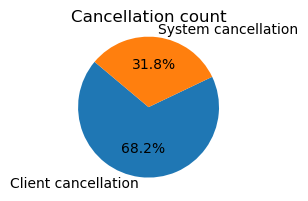

In [7]:
# Plot that represents us how many cancellation was made by system and by client.
category_of_cancellation = df1['order_status_key'].value_counts()
category = ['Client cancellation', 'System cancellation']

plt.figure(figsize=(2, 2))
plt.pie(category_of_cancellation,labels = category, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation count')
plt.axis('equal')  
plt.show()

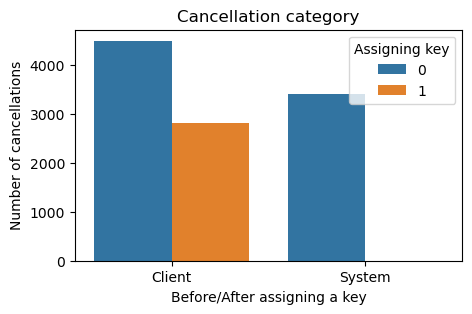

In [8]:
# Barplot that shows Number of cancellation by cancellation category before and after assigning the key.
data = df1.groupby(['order_status_key'])['is_driver_assigned_key'].value_counts().reset_index(name = 'counts')
data['order_status_key'] = data['order_status_key'].replace({4: 'Client',
        9: 'System'})
plt.figure(figsize=(5,3))
sns.barplot(data= data,
           x = 'order_status_key',
           y = 'counts',
           hue = 'is_driver_assigned_key')
plt.legend(title = 'Assigning key')
plt.xlabel('Before/After assigning a key')
plt.ylabel('Number of cancellations')
plt.title('Cancellation category')
plt.show()

On this graph we can clearly see that we have a way more Client cancellation : 7307, or  4496 -  before assigning a key , 2811 - after assigning. System cancellation - 3409, only 3 system cancellations after assigning a key.

### Task 2 

In [20]:
# Change datatype and extract hour from  'order_datetime'
df1['order_datetime'] = pd.to_datetime(df1['order_datetime'])
df1['hour'] = df1['order_datetime'].dt.hour 

Text(0.5, 1.0, 'Distribution of Cancellations by Hour')

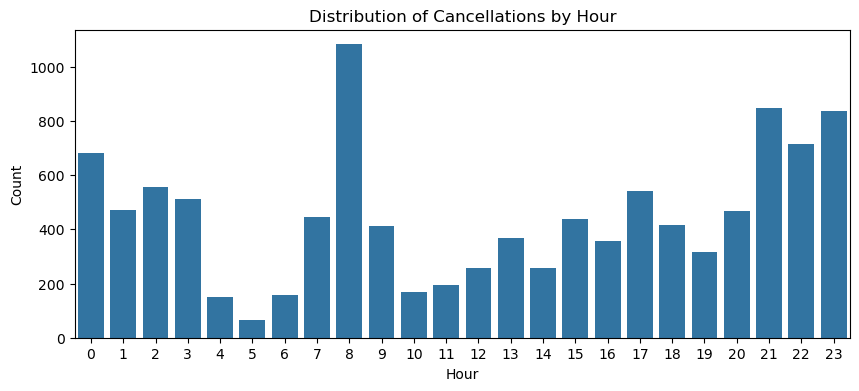

In [10]:
# Plot of distribution of failed orders by hours
hour_cancellation = df1['hour'].value_counts().reset_index().sort_values('hour')
plt.figure(figsize=(10,4))
sns.barplot(data = hour_cancellation, 
             x = 'hour', 
             y = 'count',
           )
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Cancellations by Hour')

The most of the cancellations contain 0 and 8 a.m, 9,10,11 p.m.

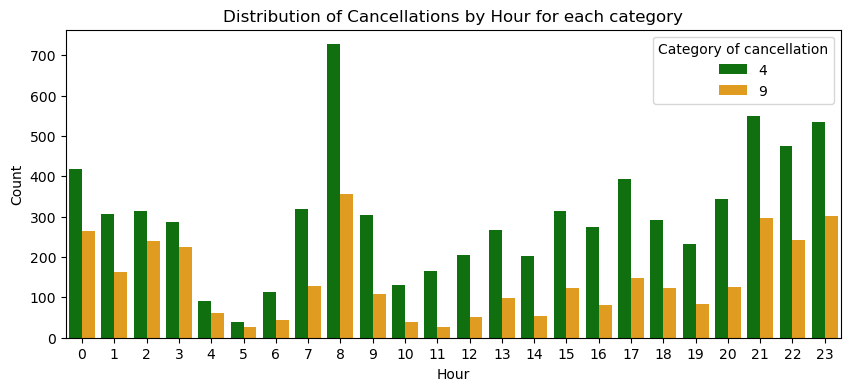

In [11]:
# Same plot representing distribution of failed orders by hours for each category of cancellation.
hour_can = df1.groupby(['hour', 'order_status_key']).size().reset_index(name = 'counts')
hour_can
plt.figure(figsize=(10,4))
sns.barplot(data = hour_can, 
             x = 'hour', 
             y = 'counts',
           hue = 'order_status_key',
           palette=['green', 'orange'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Cancellations by Hour for each category')
plt.legend(title = 'Category of cancellation')
plt.show()

Conclusion : the biggest number of system cancellations(9) are at 0, 2, 3, 8 a.m, 9,10 and 11 p.m. 
The biggest number of customer cancellations(4) are at 0,1,2,3,7,8,9 a.m. and 5,8,9,10,11 p.m. 
7,8,9 a.m. - time when people go to work and roads are quite busy.
5 p.m - time when people go from work
11 p.m. - 3 a.m. - time when people take taxi from party.

### Task 3

In [12]:
# Create a new df, where we group by hour, category of cancellation and before/after assigning a key to driver. 
#Then calculate how much time in average passed before order cancellation
avg_can = df1.groupby(['hour','order_status_key','is_driver_assigned_key']).mean(['cancellations_time_in_seconds']).reset_index()[['hour','order_status_key','is_driver_assigned_key', 'cancellations_time_in_seconds']]
avg_can.dropna(subset = 'cancellations_time_in_seconds').head(5)
# Drop all missing values from cancellations_time_in_seconds. As we did it, all data from category
#of system cancellation vanished, so we can conclude, that system cancellation happens after a couple of seconds after placing an order.


,hour,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,0,4,0,111.557047
1,0,4,1,293.616667
4,1,4,0,98.132420
5,1,4,1,247.715909
7,2,4,0,106.438819


<Axes: xlabel='cancellations_time_in_seconds'>

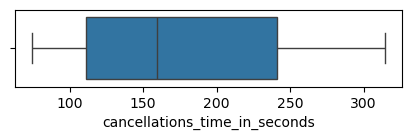

In [13]:
# Boxplot for detecting any outliers. We can conclude, that we don't have outliers,
# and medium cancellation is 160 seconds.
plt.figure(figsize = (5,1))
sns.boxplot(x = avg_can['cancellations_time_in_seconds'],fliersize=1)

Outliers: boxplot shows as that there is no outliers, medium cancellation time after ordering a taxi is 160 seconds , or 2 minutes and 40 seconds


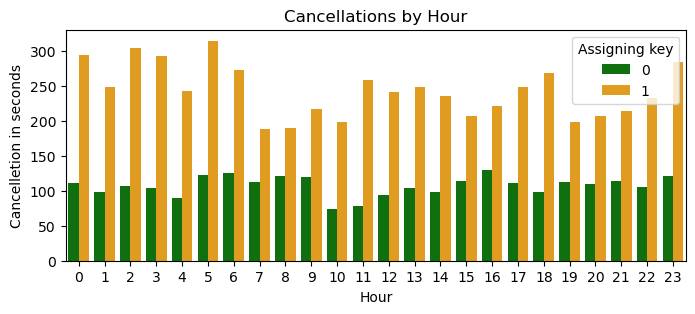

In [14]:
plt.figure(figsize=(8,3))
sns.barplot(data = avg_can, 
             x = 'hour', 
             y = 'cancellations_time_in_seconds',
           hue = 'is_driver_assigned_key',
           palette=['green', 'orange'])
plt.xlabel('Hour')
plt.ylabel('Cancelletion in seconds')
plt.title('Cancellations by Hour')
plt.legend(title = 'Assigning key')
plt.show()

Plot shows the average time to cancellation with and without driver, by the hour. In general, we can see, that people cancel faster when a driver hasn't been assigned,  107 seconds, while cancelling when driver have been assigned takes 243 seconds.

### Task 4 

In [15]:
# Exlude all records that has missing values and group by hour average eta (time before order arriving)
df1.dropna(subset = 'm_order_eta')
eta = df1.groupby(['hour']).mean(['m_order_eta'])

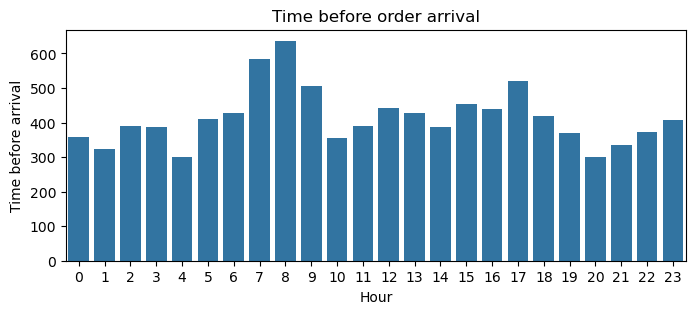

In [16]:
plt.figure(figsize=(8,3))
sns.barplot(data = eta, 
             x = 'hour', 
             y = 'm_order_eta',)
plt.xlabel('Hour')
plt.ylabel('Time before arrival')
plt.title('Time before order arrival')
plt.show()

Conclusion: In average people have to wait for 414 seconds it is almost 7 minutes for order arrival. Time of awaiting a bit longer at 7,8,9 a.m. and 5 p.m. it takes from 8.3 up to 10.3 minutes of 

### Task 4

In [17]:
pip install h3 folium

Note: you may need to restart the kernel to use updated packages.


In [18]:
import h3
import folium

In [19]:
from IPython.display import IFrame
# Calculate the H3 indexes for each order location (using resolution 8)
df1['h3_index'] = df1.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)
# Count the number of orders within each H3 index
order_counts = df1['h3_index'].value_counts().reset_index()
order_counts.columns = ['h3_index', 'order_count']
# Sort the H3 indexes by the number of orders
order_counts = order_counts.sort_values(by='order_count', ascending=False)
# Calculate the cumulative sum of order counts
order_counts['cumulative_sum'] = order_counts['order_count'].cumsum()
# Determine the H3 indexes that contain 80% of all orders
selected_h3_indexes = order_counts[order_counts['cumulative_sum'] <= 0.8 * order_counts['order_count'].sum()]
# Visualize the selected H3 indexes on a map, coloring them by the number of fails
m = folium.Map(location=[df1['origin_latitude'].mean(), df1['origin_longitude'].mean()], zoom_start=10)

for idx, row in selected_h3_indexes.iterrows():
    h3_index = row['h3_index']
    order_count = row['order_count']
    hex_center = h3.h3_to_geo(h3_index)
    folium.RegularPolygonMarker(location=[hex_center[0], hex_center[1]], fill_color='red', number_of_sides=6, radius=10, popup=f"Orders: {order_count}").add_to(m)

m.save("map.html")
IFrame(src='map.html', width=700, height=600)